# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {High variance은 머신러닝 모델이 학습 데이터에 overfitting하여, validation set 또는 train set에서는 성능이 저하되는 현상이다. 이로 인해 예측 성능이 떨어지고 모델이 지나치게 복잡해지며 계산 비용이 증가하는 상황이 벌어질 수 있다.}

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {이는 train set과 test set 모두에서 낮은 성능을 보이는 것으로 데이터의 패턴을 제대로 학습하지 못해 성능이 저하되는 현상이다. 모델이 지나치게 단순하여 성능 향상에도 어려움을 겪을 수 있다.}

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ {Bagging, 데이터를 여러 샘플로 무작위로 나눠 각 샘플별로 학습시키고 최종 결과를 평균화/투표하여 결정함으로써 모델의 overfitting 문제를 줄이고 variance를 낮출 수 있다.}


- High bias problem : 🐻‍❄️ {Boosting, 순차적으로 모델을 학습시켜서 이전 모델이 잘못 예측한 샘플에 가중치를 부여하여 다음 모델이 이를 보완하도록 하는 방식이다. 이를 통해 모델의 bias를 줄이고 점진적으로 학습하여 예측 성능을 향상시킬 수 있다.}

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [2]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [5]:
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values, data_types

(CLIENTNUM                   0
 Attrition_Flag              0
 Customer_Age                0
 Gender                      0
 Dependent_count             0
 Education_Level             0
 Marital_Status              0
 Income_Category             0
 Card_Category               0
 Months_on_book              0
 Total_Relationship_Count    0
 Months_Inactive_12_mon      0
 Contacts_Count_12_mon       0
 Credit_Limit                0
 Total_Revolving_Bal         0
 Avg_Open_To_Buy             0
 Total_Amt_Chng_Q4_Q1        0
 Total_Trans_Amt             0
 Total_Trans_Ct              0
 Total_Ct_Chng_Q4_Q1         0
 Avg_Utilization_Ratio       0
 dtype: int64,
 CLIENTNUM                     int64
 Attrition_Flag               object
 Customer_Age                  int64
 Gender                       object
 Dependent_count               int64
 Education_Level              object
 Marital_Status               object
 Income_Category              object
 Card_Category                object
 

In [6]:
df.drop('CLIENTNUM', axis=1, inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


Decision Tree Accuracy: 0.9294
Random Forest Accuracy: 0.9531


c:\Users\win2d\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9516
Gradient Boosting Accuracy: 0.9669


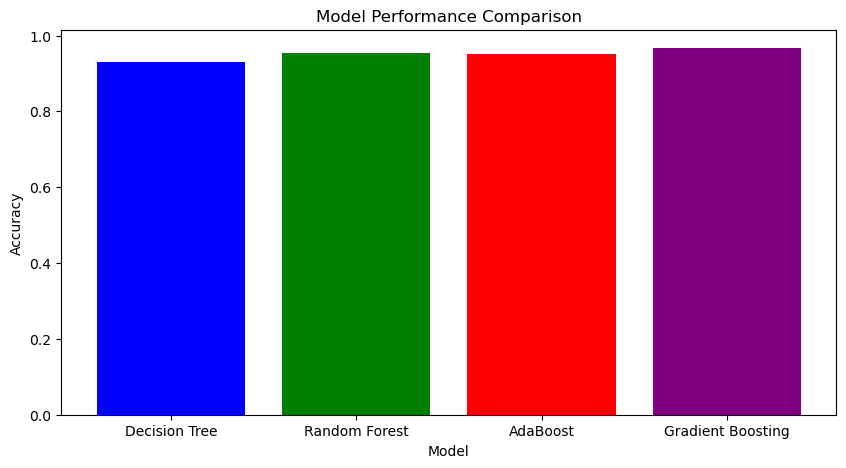

In [7]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# 데이터 분리
X = df_encoded.drop('Attrition_Flag_Existing Customer', axis=1)  # 타겟 변수 제외
y = df_encoded['Attrition_Flag_Existing Customer']  # 타겟 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 초기화
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# 모델 학습 및 성능 평가
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')

# 성능 비교
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()

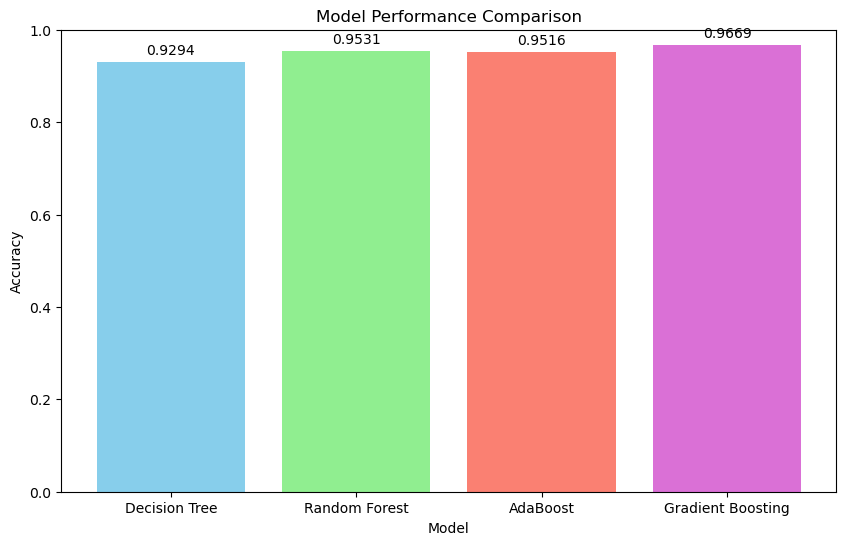

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon', 'orchid'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.ylim(0, 1) 
plt.show()